In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import datetime
import numpy as np
import matplotlib.dates as mdates

In [32]:
# Get all raw data
nyt_data = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv")
client = Socrata("healthdata.gov", None)
results = client.get("g62h-syeh", limit=100000)

In [160]:
# Filter data to get columns of interest
hhs_data = pd.DataFrame.from_records(results)[['state', 'date', 'inpatient_beds_used_covid']]
hhs_data = hhs_data.astype({'inpatient_beds_used_covid': 'float32'})

In [161]:
hhs_data['date'] = hhs_data['date'].apply(lambda x: x[:10])
hhs_data['date'] = pd.to_datetime(hhs_data['date'])
nyt_data.date = pd.to_datetime(nyt_data.date)

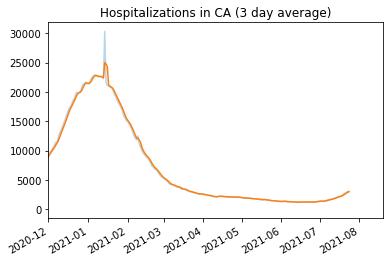

In [179]:
ca_data = hhs_data[hhs_data['state'] == 'CA']
ca_data = ca_data.sort_values(by='date', axis=0)
fig, ax = plt.subplots()
ax.plot(ca_data['date'], ca_data['inpatient_beds_used_covid'], alpha=.3)
ax.plot(ca_data['date'], ca_data.inpatient_beds_used_covid.rolling(3).mean()) #--- How to calculate rolling average, not needed for hospitalizations
plt.title("Hospitalizations in CA (3 day average)")
plt.xlim(left=datetime.date(2020, 12, 1))
fig.autofmt_xdate()
plt.show()



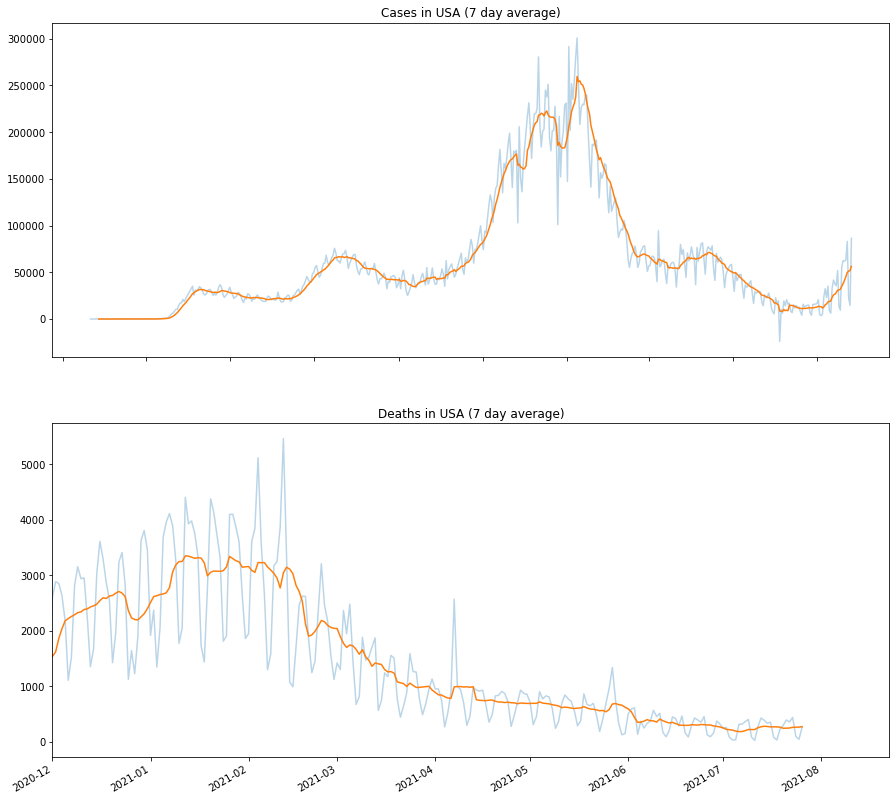

In [187]:
nyt_data_usa = nyt_data[nyt_data.geoid=="USA"]
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
ax1.plot(nyt_data_usa['date'], nyt_data_usa['cases'], alpha=.3)
ax1.plot(nyt_data_usa['date'], nyt_data_usa.cases.rolling(7).mean())
ax2.plot(nyt_data_usa['date'], nyt_data_usa['deaths'], alpha=.3)
ax2.plot(nyt_data_usa.date, nyt_data_usa.deaths.rolling(7).mean())

ax1.title.set_text("Cases in USA (7 day average)")
ax2.title.set_text("Deaths in USA (7 day average)")
plt.xlim(left=datetime.date(2020, 12, 1))
fig.autofmt_xdate()